In [3]:
# Importing necessary libraries for analysis
import pandas as pd

# Defining the key data points for MLB
cbt_threshold_mlb_2024 = 237000000  # Competitive Balance Tax Threshold for MLB in 2024
ohtani_annual_cap_hit = 46000000    # Ohtani's reported annual cap hit
ohtani_contract_value = 700000000   # Total value of Ohtani's contract
ohtani_deferred_amount = 68000000   # Annual deferred amount
ohtani_actual_annual_salary = 2000000  # Ohtani's actual salary per year after deferring
mlb_team_roster_size = 25          # Standard MLB team roster size

# Calculating Ohtani's cap hit proportion in MLB
ohtani_cap_proportion_mlb = ohtani_annual_cap_hit / cbt_threshold_mlb_2024

# Calculating the average player cost for an MLB team
average_player_cost_mlb = cbt_threshold_mlb_2024 / mlb_team_roster_size

# Creating a DataFrame to display MLB data neatly
mlb_data = pd.DataFrame({
    "Item": ["CBT Threshold (2024)", "Ohtani's Cap Hit", "Ohtani's Contract Value", "Ohtani's Deferred Amount", "Ohtani's Annual Salary", "Ohtani's Cap Hit Proportion", "Average Player Cost"],
    "Amount": [cbt_threshold_mlb_2024, ohtani_annual_cap_hit, ohtani_contract_value, ohtani_deferred_amount, ohtani_actual_annual_salary, ohtani_cap_proportion_mlb, average_player_cost_mlb],
    "Description": ["Competitive Balance Tax Threshold", "Annual impact on team's tax calculation", "Total contract value", "Annual amount deferred", "Actual annual salary received", "Proportion of tax threshold occupied by Ohtani", "Average cost per player for a team"]
})

mlb_data


,Item,Amount,Description
0,CBT Threshold (2024),2.370000e+08,Competitive Balance Tax Threshold
1,Ohtani's Cap Hit,4.600000e+07,Annual impact on team's tax calculation
2,Ohtani's Contract Value,7.000000e+08,Total contract value
3,Ohtani's Deferred Amount,6.800000e+07,Annual amount deferred
4,Ohtani's Annual Salary,2.000000e+06,Actual annual salary received
5,Ohtani's Cap Hit Proportion,1.940928e-01,Proportion of tax threshold occupied by Ohtani
6,Average Player Cost,9.480000e+06,Average cost per player for a team


In [43]:
# Defining key data points for the NBA
nba_salary_cap_2023_2024 = 165294000  # NBA Salary Cap for 2023-2024 season
steph_curry_salary = 51915615         # Steph Curry's salary for the 2023-2024 season
nba_team_roster_size = 15             # Standard NBA team roster size

# Calculating Curry's cap hit proportion in the NBA
curry_cap_proportion_nba = steph_curry_salary / nba_salary_cap_2023_2024

# Calculating the average player cost for an NBA team
average_player_cost_nba = nba_salary_cap_2023_2024 / nba_team_roster_size

# Creating a DataFrame to display NBA data neatly
nba_data = pd.DataFrame({
    "Item": ["NBA Salary Cap (2023-2024)", "Curry's Salary", "Curry's Cap Hit Proportion", "Average Player Cost"],
    "Amount": [nba_salary_cap_2023_2024, steph_curry_salary, curry_cap_proportion_nba, average_player_cost_nba],
    "Description": ["NBA Salary Cap for the 2023-2024 season", "Steph Curry's salary for the 2023-2024 season", "Proportion of salary cap occupied by Curry", "Average cost per player for a team"]
})

nba_data


,Item,Amount,Description
0,NBA Salary Cap (2023-2024),1.652940e+08,NBA Salary Cap for the 2023-2024 season
1,Curry's Salary,5.191562e+07,Steph Curry's salary for the 2023-2024 season
2,Curry's Cap Hit Proportion,3.140805e-01,Proportion of salary cap occupied by Curry
3,Average Player Cost,1.101960e+07,Average cost per player for a team


In [44]:
# Calculating the expected cap hit proportion for an average player in both leagues
expected_cap_proportion_mlb = 1 / mlb_team_roster_size  # 1/40 for MLB
expected_cap_proportion_nba = 1 / nba_team_roster_size  # 1/15 for NBA

# Standardizing Ohtani's and Curry's cap hit proportion to their respective expected amounts
standardized_ohtani_proportion = ohtani_cap_proportion_mlb / expected_cap_proportion_mlb
standardized_curry_proportion = curry_cap_proportion_nba / expected_cap_proportion_nba

# Creating a DataFrame to display the standardized data
standardized_data = pd.DataFrame({
    "League": ["MLB", "NBA"],
    "Player": ["Shohei Ohtani", "Steph Curry"],
    "Actual Cap Hit Proportion": [ohtani_cap_proportion_mlb, curry_cap_proportion_nba],
    "Expected Cap Hit Proportion (1/roster size)": [expected_cap_proportion_mlb, expected_cap_proportion_nba],
    "Standardized Cap Hit Proportion": [standardized_ohtani_proportion, standardized_curry_proportion]
})

standardized_data


,League,Player,Actual Cap Hit Proportion,Expected Cap Hit Proportion (1/roster size),Standardized Cap Hit Proportion
0,MLB,Shohei Ohtani,0.194093,0.040000,4.852321
1,NBA,Steph Curry,0.314080,0.066667,4.711207


In [109]:
salary = pd.read_csv('nba_salaries.csv', header=1)
salary["2023-24"] = salary["2023-24"].str.replace("$", "").fillna(0).astype(int)
salary = salary[['Rk', 'Player', 'Tm', '2023-24', '-9999']]

In [110]:
nba_salary_cap_2023_2024
salary['proportion'] = (salary['2023-24'] / nba_salary_cap_2023_2024) * 100
# ohtani_data = pd.DataFrame({"Rk": ['420'], 
#                             "Player": ["Shohei Ohtani"], 
#                             "Tm": ["LAD"], 
#                             "2023-24": [46000000], 
#                             "proportion": [19.41],
#                             "-9999": ['daGoat17']})

# # Using concat instead of append
# salary = pd.concat([salary, ohtani_data], ignore_index=True)


In [111]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
salary.sort_values(by = 'proportion', ascending=False)

,Rk,Player,Tm,2023-24,-9999,proportion
0,1,Stephen Curry,GSW,51915615,curryst01,31.408046
1,2,Kevin Durant,PHO,47649433,duranke01,28.827080
2,3,Nikola Jokić,DEN,47607350,jokicni01,28.801620
4,5,LeBron James,LAL,47607350,jamesle01,28.801620
3,4,Joel Embiid,PHI,47607350,embiijo01,28.801620
...,...,...,...,...,...,...
476,477,Didi Louzada,POR,268032,louzama01,0.162155
477,478,Neemias Queta,SAC,250000,quetane01,0.151246
478,479,Danny Green,PHI,200000,greenda02,0.120997
479,480,Demetrius Jackson,BOS,92857,jacksde01,0.056177


In [191]:
# Define a color map for the NBA teams and the Dodgers using HEX color codes for accuracy
team_colors = {
    "GSW": "#1D428A",  # Golden State Warriors
    "PHO": "#1D1160",  # Phoenix Suns
    "DEN": "#0E2240",  # Denver Nuggets
    "PHI": "#006BB6",  # Philadelphia 76ers
    "LAL": "#552583",  # Los Angeles Lakers
    "MIL": "#00471B",  # Milwaukee Bucks
    "LAC": "#C8102E",  # LA Clippers
    "MIA": "#98002E",  # Miami Heat
    "MIN": "#0C2340",  # Minnesota Timberwolves
    "HOU": "#CE1141",  # Houston Rockets
    "ATL": "#E03A3E",  # Atlanta Hawks
    "DAL": "#00538C",  # Dallas Mavericks
    "CHI": "#CE1141",  # Chicago Bulls
    "BRK": "#36454F",  # Brooklyn Nets
    "TOR": "#CE1141",  # Toronto Raptors
    "BOS": "#007A33",  # Boston Celtics
    "NOP": "#0C2340",  # New Orleans Pelicans
    "MEM": "#5D76A9",  # Memphis Grizzlies
    "CLE": "#860038",  # Cleveland Cavaliers
    "OKC": "#007AC1",  # Oklahoma City Thunder
    "SAC": "#5A2D81",  # Sacramento Kings
    "POR": "#E03A3E",  # Portland Trail Blazers
    "CHO": "#1D1160",  # Charlotte Hornets
    "NYK": "#006BB6",  # New York Knicks
    "WAS": "#002B5C",  # Washington Wizards
    "UTA": "#002B5C",  # Utah Jazz
    "IND": "#002D62",  # Indiana Pacers
    "SAS": "#C4CED4",  # San Antonio Spurs
    "DET": "#C8102E",  # Detroit Pistons
    "ORL": "#0077C0",  # Orlando Magic
    "LAD": "#005A9C",  # Los Angeles Dodgers
}

In [113]:
salary_subset = salary[salary.proportion > 18]

In [71]:
from nba_api import *

In [77]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo

In [142]:
players_df = pd.DataFrame(players.get_players())

In [143]:
players_df['img_url'] = 'https://cdn.nba.com/headshots/nba/latest/1040x760/' + players_df['id'].astype(str) + '.png' 

In [145]:
merged_raw = players_df.merge(salary, left_on = 'full_name', right_on = 'Player', how = 'right')
# merged_raw[merged_raw.full_name.isnull()]

In [124]:
from fuzzywuzzy import process

# Function to find the closest match
def get_closest_match(x, list_names):
    closest_match = process.extractOne(x, list_names)
    return closest_match[0]

# Assuming 'full_name' column in players_df and 'Player' column in salary DataFrame
close_matches = salary['Player'].apply(lambda x: get_closest_match(x, players_df['full_name']))
salary['closest_match'] = close_matches


In [146]:
salary['nba_api_name'] = salary['Player']

replacements = {
    'Nikola Jokić': 'Nikola Jokic',
    'Luka Dončić': 'Luka Doncic',
    "Kristaps Porziņģis":"Kristaps Porzingis",
    "Bojan Bogdanović":"Bojan Bogdanovic",
    "Bogdan Bogdanović":"Bogdan Bogdanovic",
    "Nikola Vučević":"Nikola Vucevic",
    "Marcus Morris":"Marcus Morris Sr.",
    "Dāvis Bertāns":"Davis Bertans",
    "Jusuf Nurkić":"Jusuf Nurkic",
    "Jonas Valančiūnas":"Jonas Valanciunas",
    "Dennis Schröder":"Dennis Schroder",
    "Robert Williams":"Robert Williams III",
    "Reggie Bullock":"Reggie Bullock Jr.",
    "Vasilije Micić":"Vasilije Micic",
    "Kevin Porter Jr.":"Kevin Porter Jr.",
    "Alperen Şengün":"Alperen Sengun",
    "Nikola Jović":"Nikola Jovic",
    "Vlatko Čančar":"Vlatko Cancar",
    "Luka Šamanić":"Luka Samanic",
    "Dario Šarić":"Dario Saric",
    "Harry Giles":"Harry Giles III",
    "Boban Marjanović":"Boban Marjanovic",
    "Xavier Tillman Sr.":"Xavier Tillman",
    "A.J. Green":"AJ Green",
    "Filip Petrušev":"Filip Petrusev",
}

for old_name, new_name in replacements.items():
    salary.loc[salary['Player'] == old_name, 'nba_api_name'] = new_name


In [147]:
merged_cleaned = players_df.merge(salary, left_on = 'full_name', right_on = 'nba_api_name', how = 'right').drop(['closest_match', 'nba_api_name', 'Player', 'first_name', 'last_name', '-9999', 'is_active'], axis = 1)
merged_cleaned

,id,full_name,img_url,Rk,Tm,2023-24,proportion
0,201939,Stephen Curry,https://cdn.nba.com/headshots/nba/latest/1040x...,1,GSW,51915615,31.408046
1,201142,Kevin Durant,https://cdn.nba.com/headshots/nba/latest/1040x...,2,PHO,47649433,28.827080
2,203999,Nikola Jokic,https://cdn.nba.com/headshots/nba/latest/1040x...,3,DEN,47607350,28.801620
3,203954,Joel Embiid,https://cdn.nba.com/headshots/nba/latest/1040x...,4,PHI,47607350,28.801620
4,2544,LeBron James,https://cdn.nba.com/headshots/nba/latest/1040x...,5,LAL,47607350,28.801620
...,...,...,...,...,...,...,...
476,203457,Nerlens Noel,https://cdn.nba.com/headshots/nba/latest/1040x...,476,SAC,300000,0.181495
477,1629712,Didi Louzada,https://cdn.nba.com/headshots/nba/latest/1040x...,477,POR,268032,0.162155
478,1629674,Neemias Queta,https://cdn.nba.com/headshots/nba/latest/1040x...,478,SAC,250000,0.151246
479,201980,Danny Green,https://cdn.nba.com/headshots/nba/latest/1040x...,479,PHI,200000,0.120997


In [167]:
ohtani_data = pd.DataFrame({"id": ['4202048'], 
                            "full_name": ["Shohei Ohtani"], 
                            'Rk':[420],
                            "Tm": ["LAD"], 
                            "2023-24": [46000000], 
                            "proportion": [19.41],
                            'img_url': 'https://img.mlbstatic.com/mlb-photos/image/upload/d_people:generic:headshot:67:current.png/w_426,q_auto:best/v1/people/660271/headshot/67/current'
                            })

# Using concat instead of append
final = pd.concat([merged_cleaned, ohtani_data], ignore_index=True)
final.loc[final.id == 76526, 'id'] = 1631098

In [158]:
# Function to load and resize an image
def get_image(url, zoom=0.15):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    img = ImageOps.contain(img, (int(img.width * zoom), int(img.height * zoom)), method=Image.Resampling.LANCZOS)
    return img



NameError: name 'get_img' is not defined

In [163]:
shohei_url = 'https://img.mlbstatic.com/mlb-photos/image/upload/d_people:generic:headshot:67:current.png/w_426,q_auto:best/v1/people/660271/headshot/67/current'
requests.get('https://cdn.nba.com/headshots/nba/latest/1040x760/202322.png').content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x10\x00\x00\x02\xf8\x08\x03\x00\x00\x00\xf5|\xf4\x17\x00\x00\x03\x00PLTE\x00\x00\x006\\\xc8>@G=b\xccHn\xd67:B24;+-/\x1b\x1c\x1d(\'(+*-\xab\xc0\xe4"!"\xa1\x1b7co\x8c\n$j\x07 k\x07#q\xa7\xc0\xe0\xa2\xbd\xdf\r\r\x0c\x12\x11\x11\x17\x16\x15\x1c\x1b\x1a\xfe\xff\xff\xf9\xfe\xff4*%/V\xc6$ \x1d61,B(\x189&\x1a+&#Q.\x1b7_\xce>-"\x07\x07\x061Z\xcf2Z\xcab6\x1dh;"$J\xb7Y1\x1b0"\x1a\x1fD\xb1D<4H/ )Q\xc3-R\xbf+O\xba-V\xcc4]\xd38a\xd6;84%M\xbf~G(vB$\x97X4=f\xd9@5-\x9c]9o>"\xfeZ[\xb7\x7f_\xfeSSLB9\xc0\x83`*\x1b\x13\xb5wT\xa6fA\xb8\x87j\xabsS[6"\xc2\x8ai\xca\x90nBj\xde=e\xd3\x83L-\xa9lJL)\x15\x8bP/\x91S0\xb2qJC@<\xf5\xfb\xfe)Q\xc8\x1a>\xabKGA\x9ea@\xafz[\xa5a9\x19:\xa3\x18/\xa3I6)\x8a^DR6%nB)\x9axb\xbf\x8erwF+\xc8\x95x\xb0\x80e+-.(J\xb1O</\x96iN\x8eW8\x14)\x99\xa0nP\xa6y^\xd1\x9c}\xa0sX#C\xa8QMG $(\xd2\x96t4X\xc1\xbe|VmH3\x9fgH\x1d4\xaa\x94bE\xaejATI?\x96pXa<\'\x94\\<}^JdC.XD6\x85X>\\OD\x8ckW\xa4\x7fg!\x14\x0e\x88L)\x86Q5|B \xf2*-Iq\xe4qYHY>-WSL\x175\x9a

In [182]:
from PIL import Image, ImageOps
import requests
import io

def get_image(url, zoom=1):
    try:
        response = requests.get(url)
        img = Image.open(io.BytesIO(response.content))
        img = img.resize((int(img.width * zoom), int(img.height * zoom)), Image.Resampling.LANCZOS)
        # Assuming 'img' is the PIL Image object
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Assuming 'img' is the PIL Image object
        if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
            alpha = img.convert('RGBA').split()[-1]
            bg = Image.new("RGB", img.size, (255, 255, 255) + (255,))
            bg.paste(img, mask=alpha)
            img = bg
        return img
    except IOError:
        print(f"Error loading image from {url}")
        return None  # or a default image


# Pre-load images (assuming salary_df_sorted has 'img_url' column)
images = {player: get_image(url) for player, url in zip(final['full_name'], final['img_url'])}

def make_background_transparent(img, threshold=200):
    # Convert image to RGBA (if not already in this mode)
    img = img.convert("RGBA")
    # Load the data of the image into an array
    datas = img.getdata()
    
    newData = []
    for item in datas:
        # Change all white (also shades of whites)
        # pixels to transparent
        if item[0] > threshold and item[1] > threshold and item[2] > threshold:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    
    img.putdata(newData)
    return img

# Apply this function to all loaded images
images = {player: make_background_transparent(img) for player, img in images.items()}

/Users/williamfoote/Documents/GitHub/willybears_crystal_balls/.venv/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error loading image from https://cdn.nba.com/headshots/nba/latest/1040x760/76526.png


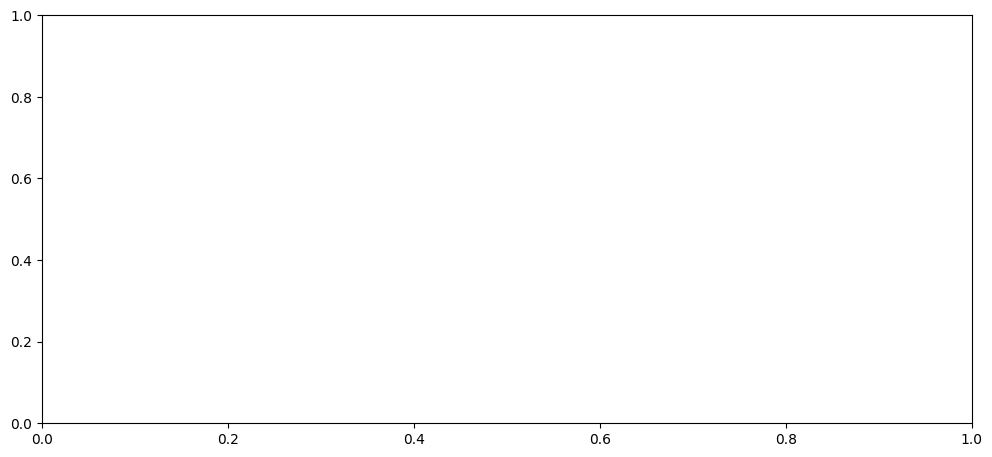

In [183]:
# Sorting the DataFrame by 'proportion' in descending order
salary_df_sorted = final[final.proportion > 16].sort_values(by='proportion', ascending=False)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from io import BytesIO

# Function to convert image backgrounds to transparent
def make_background_transparent(img, player_name, white_threshold=240, gray_threshold=180):
    img = img.convert("RGBA")
    datas = img.getdata()
    
    newData = []
    for item in datas:
        if player_name == 'Shohei Ohtani' and all(value < gray_threshold for value in item[:3]):
            newData.append((255, 255, 255, 0))
        elif all(value > white_threshold for value in item[:3]):
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    
    img.putdata(newData)
    return img

# Function to fetch and process images
def fetch_process_images(player_urls, white_threshold=240, gray_threshold=180):
    images = {}
    for player, url in player_urls.items():
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        if player == 'Shohei Ohtani':  # Check if the player is Shohei Ohtani
            processed_img = make_background_transparent(img, player, gray_threshold=gray_threshold)
        else:
            processed_img = make_background_transparent(img, player, white_threshold=white_threshold)
        images[player] = processed_img
    return images

# Assuming 'final' is your DataFrame with 'full_name' and 'img_url' columns
final = # Your DataFrame here
player_urls = final.set_index('full_name')['img_url'].to_dict()
images = fetch_process_images(player_urls)

# Set up the figure for the animation
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(bottom=0.2)  # Increase space for player names

# Animation function
def animate(i):
    ax.clear()
    data = final.head(i + 1)
    bars = ax.bar(data['full_name'], data['proportion'], color=[team_colors[tm] for tm in data['Tm']])
    
    ax.set_xlabel("Player")
    ax.set_ylabel("Proportional Cap Hit (%)")
    ax.set_title("Proportional Cap Hit of NBA Players and Shohei Ohtani")
    ax.set_ylim(0, final['proportion'].max() + 5)
    
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data['full_name'], rotation=45, ha='right')

    for bar, player in zip(bars, data['full_name']):
        img = images.get(player)
        if img:  # Only if the image was successfully loaded
            zoom_factor = 0.15  # Adjust as needed
            offset_img = OffsetImage(img, zoom=zoom_factor)
            ab = AnnotationBbox(offset_img, (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                frameon=False, box_alignment=(0.5, 1))
            ax.add_artist(ab)

# Creating and displaying the animation
num_frames = len(final)
anim = FuncAnimation(fig, animate, frames=num_frames, interval=500, repeat=False)
plt.show()

# Save the animation
anim.save('animation_pics.mp4')


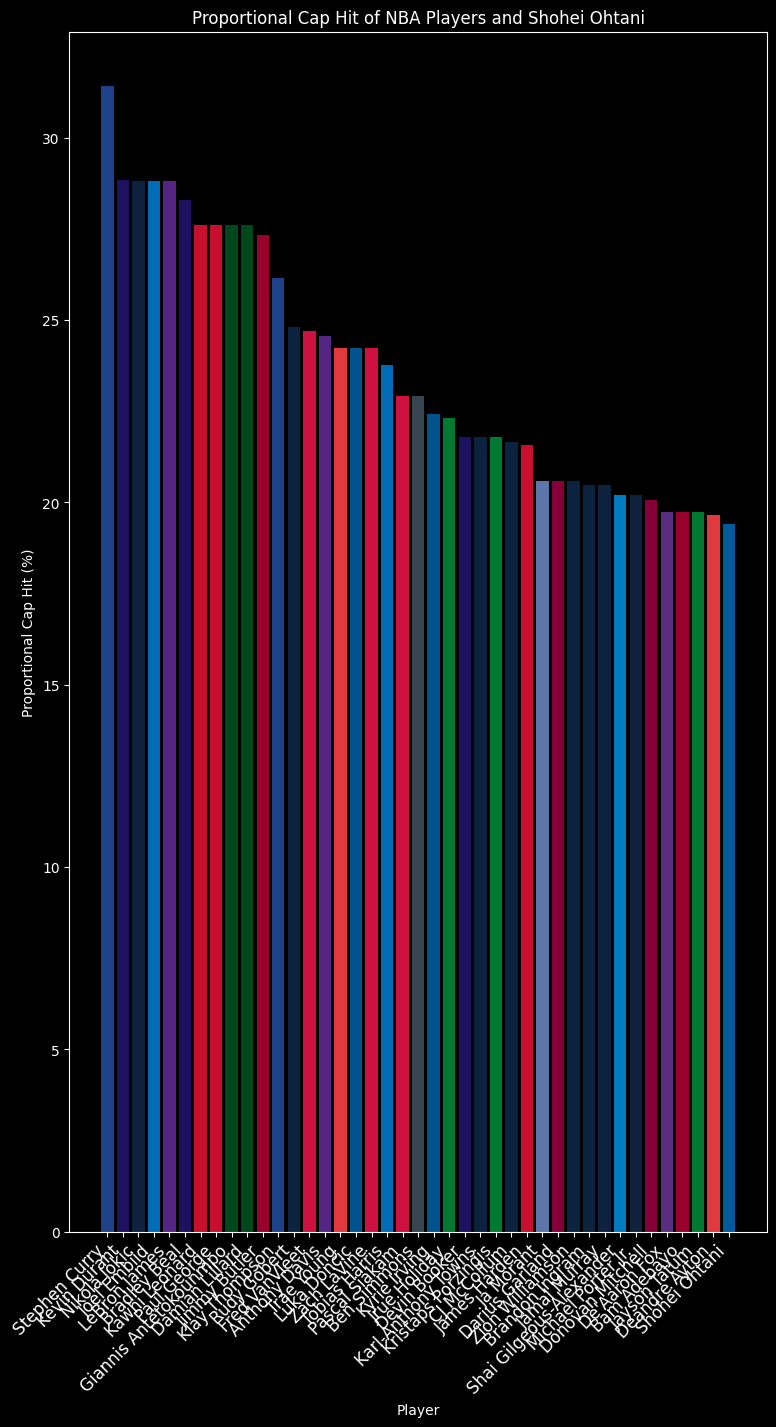

In [196]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Set the style of the plot to a dark theme
plt.style.use('dark_background')
salary_df_sorted = final[final.proportion > 19.4].sort_values(by='proportion', ascending=False)

# Set up the figure and axis for the animation with a 9:16 aspect ratio
# The figure size (width, height) in inches can be set to reflect 9:16 ratio. For example:
fig, ax = plt.subplots(figsize=(9, 16))

def animate(i):
    # Clearing the axis to redraw
    ax.clear()

    # Selecting the top 'i' players to display in the animation
    data = salary_df_sorted.head(i+1)
    
    # Creating the bar chart
    bars = ax.bar(data['full_name'], data['proportion'], color=[team_colors[tm] for tm in data['Tm']])

    # Customizing the plot
    ax.set_xlabel("Player", color='white')
    ax.set_ylabel("Proportional Cap Hit (%)", color='white')
    ax.set_title("Proportional Cap Hit of NBA Players and Shohei Ohtani", color='white')
    ax.tick_params(colors='white')
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data['full_name'], rotation=45, ha='right', fontsize = 12)
    ax.set_ylim(0, salary_df_sorted['proportion'].max() + 1.5)  # Adjust y-axis limit
    plt.subplots_adjust(bottom=0.2, top=0.95)  # Adjust spacing

# Creating the animation
num_frames = len(salary_df_sorted)  # Number of frames in the animation
anim = FuncAnimation(fig, animate, frames=num_frames, interval=500, repeat=False)

# Save the animation with a vertical aspect ratio suitable for TikTok
anim.save('animation_dark_mode_vertical.mp4', dpi=300, writer='ffmpeg')

# Display the plot
plt.show()
